# Multiple Linear Regression

## Step 1: Importing Dataset and EDA

### Importing the libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette(['#3F7C85', '#FF5F5D', '#00CCBF', '#72F2EB', '#747E7E'])

# import warnings
# warnings.filterwarnings('ignore')

### Importing the dataset

In [ ]:
df = pd.read_csv('datasets/50_Startups.csv')

### EDA

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.shape

(50, 5)

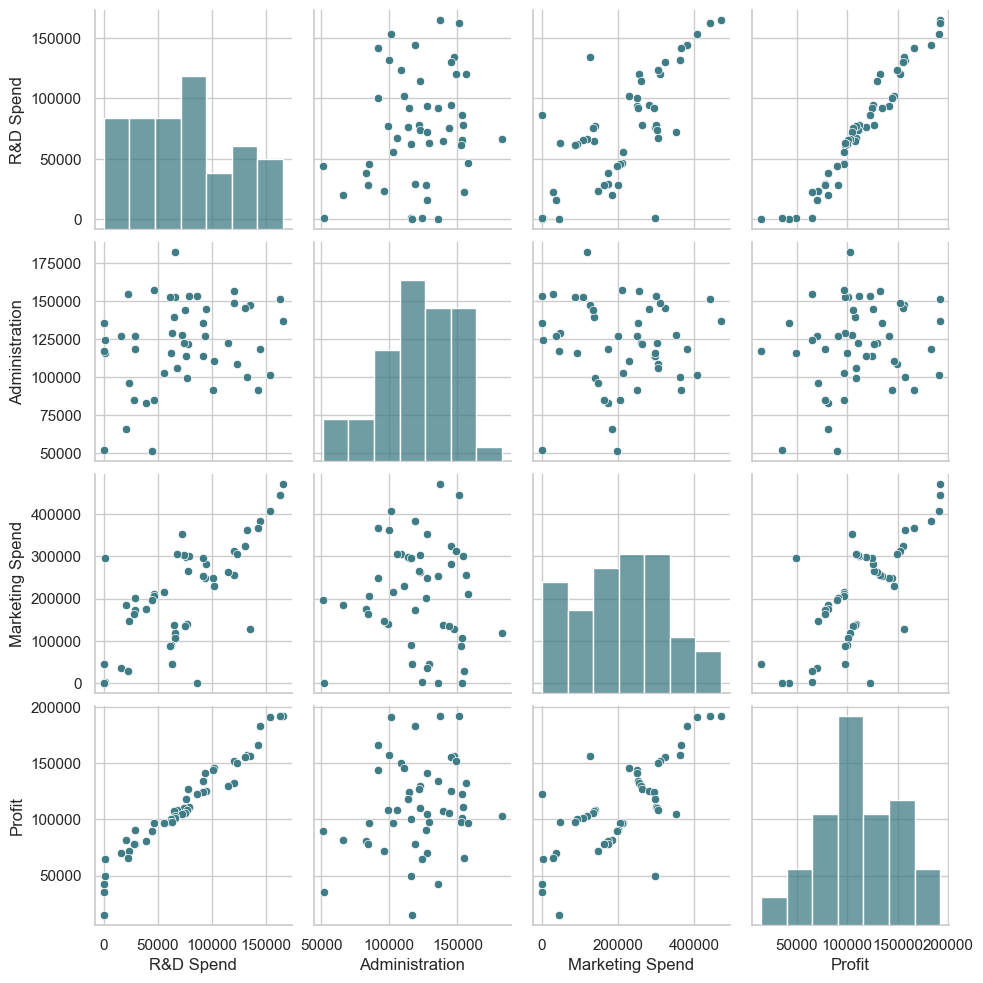

In [ ]:
sns.pairplot(df);

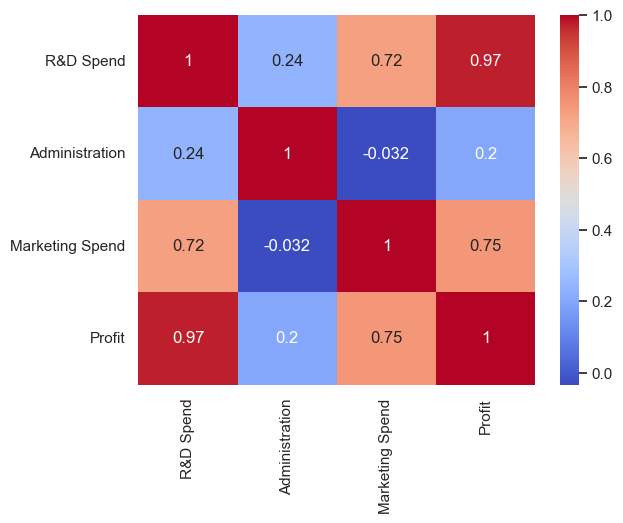

In [ ]:
sns.heatmap(df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].corr(), annot=True, cmap="coolwarm");

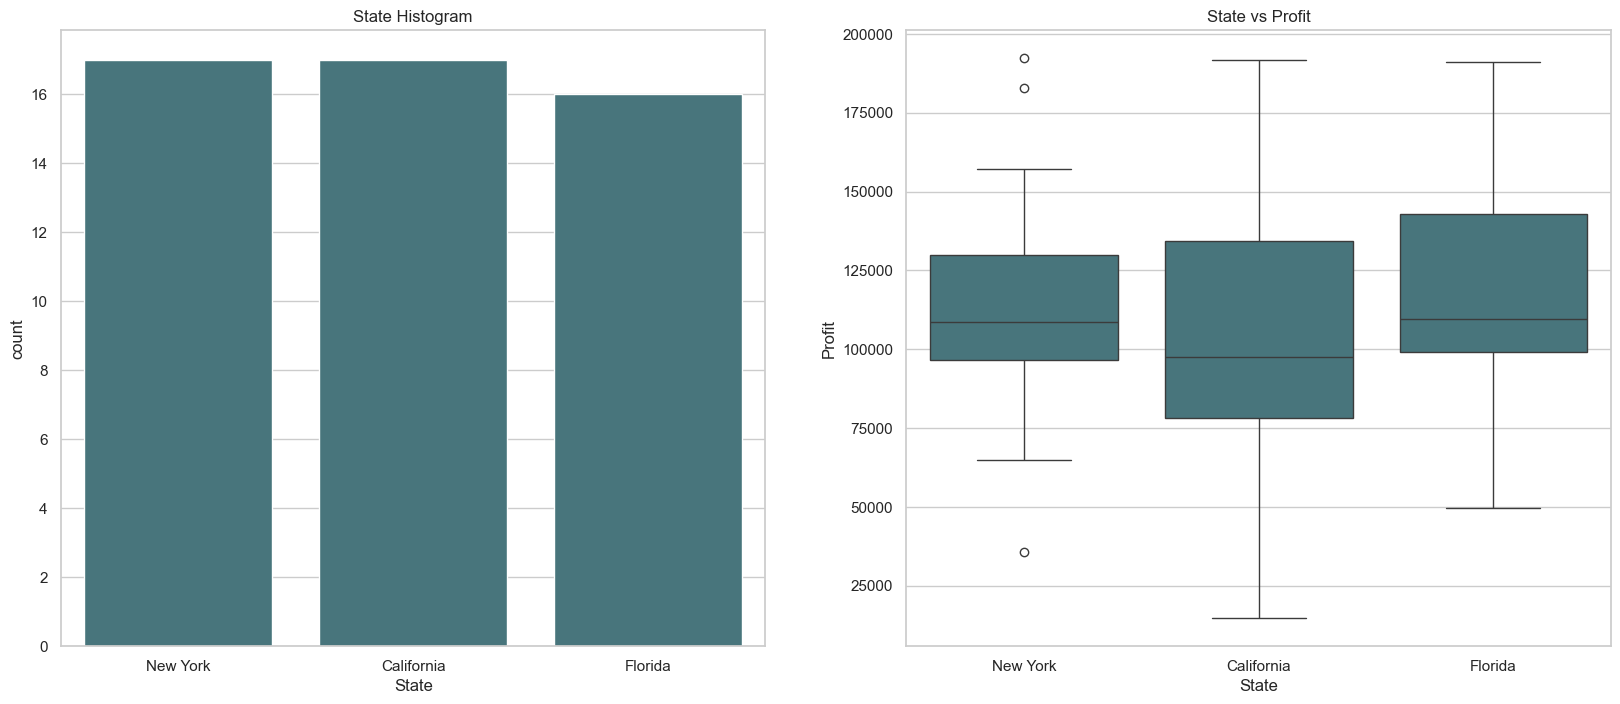

In [ ]:
plt.figure(figsize=(20,8));
plt.subplot(1,2,1); plt.title('State Histogram'); sns.countplot(data=df, x="State")
plt.subplot(1,2,2); plt.title('State vs Profit'); sns.boxplot(data=df, x="State", y="Profit")
plt.show()

Text(0.5, 1.0, 'State vs Average Profit')

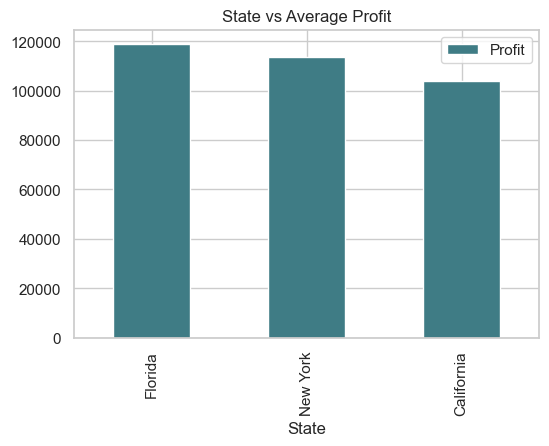

In [ ]:
df1 = pd.DataFrame(df.groupby(['State'])['Profit'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(6,4)); plt.title('State vs Average Profit')

## Step 2: Data Preprocessing

### Encoding Categorical data

In [ ]:
temp = pd.get_dummies(df['State'], prefix='State')
df = pd.concat([df, temp], axis=1)
df.drop('State', axis = 1, inplace = True)

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False,False
2,153441.51,101145.55,407934.54,191050.39,False,True,False
3,144372.41,118671.85,383199.62,182901.99,False,False,True
4,142107.34,91391.77,366168.42,166187.94,False,True,False


### Seperating the dataset and its labels (Creating X and Y)

In [ ]:
X = df.drop(['Profit'], axis=1)
Y = df['Profit']

### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
print(f"{X_train.shape=}")
print(f"{Y_train.shape=}")
print(f"{X_test.shape=}")
print(f"{Y_test.shape=}")

X_train.shape=(40, 6)
Y_train.shape=(40,)
X_test.shape=(10, 6)
Y_test.shape=(10,)


## Step 3: Fitting Multiple Linear Regression to the Training set

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print(f"Intercept: {regressor.intercept_}")
print(f"Coefficients: {pd.DataFrame(regressor.coef_, X.columns)}")

Intercept: 42467.52924855314
Coefficients:                            0
R&D Spend           0.773467
Administration      0.032885
Marketing Spend     0.036610
State_California   86.638369
State_Florida    -872.645791
State_New York    786.007422


## Step 4: Predicting the Test set results

In [ ]:
Y_pred = regressor.predict(X_test)

In [ ]:
X_test

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
28,66051.52,182645.56,118148.20,False,True,False
11,100671.96,91790.61,249744.55,True,False,False
10,101913.08,110594.11,229160.95,False,True,False
41,27892.92,84710.77,164470.71,False,True,False
2,153441.51,101145.55,407934.54,False,True,False
27,72107.60,127864.55,353183.81,False,False,True
38,20229.59,65947.93,185265.10,False,False,True
31,61136.38,152701.92,88218.23,False,False,True
22,73994.56,122782.75,303319.26,False,True,False
4,142107.34,91391.77,366168.42,False,True,False


In [ ]:
Y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

### Making Predictions on data outside dataset

In [ ]:
k = pd.DataFrame([[76051.52, 152645.56, 108148.2, True, False, False]],
                 columns=['R&D Spend', 'Administration', 'Marketing Spend', 'State_California',
       'State_Florida', 'State_New York'])

In [ ]:
regressor.predict(k)

array([110356.51950062])

## Step 5: Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

print("R^2 : ", r2_score(Y_test, Y_pred))
print("MAE :", mean_absolute_error(Y_test, Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred)))

R^2 :  0.9347068473282423
MAE : 7514.2936596406125
RMSE: 9137.99015279496


In [ ]:
pd.DataFrame.from_dict({'Y_test':Y_test, 'Yhat':Y_pred.round(2), 'Diff':Y_test-Y_pred.round(2)})

,Y_test,Yhat,Diff
28,103282.38,103015.20,267.18
11,144259.40,132582.28,11677.12
10,146121.95,132447.74,13674.21
41,77798.83,71976.10,5822.73
2,191050.39,178537.48,12512.91
27,105008.31,116161.24,-11152.93
38,81229.06,67851.69,13377.37
31,97483.56,98791.73,-1308.17
22,110352.25,113969.44,-3617.19
4,166187.94,167921.07,-1733.13


Text(0.5, 0, 'Errors')

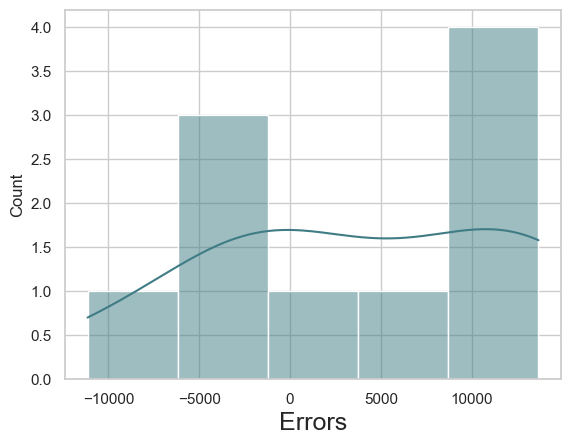

In [ ]:
sns.histplot((Y_test - Y_pred), kde=True)
plt.xlabel('Errors', fontsize = 18)

## Step 6: Visualization

<Axes: xlabel='Y_test', ylabel='Y_pred'>

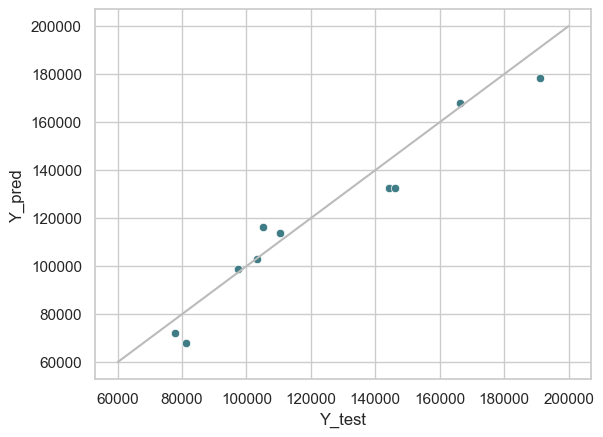

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(x=Y_test, y=Y_pred); plt.xlabel('Y_test'); plt.ylabel('Y_pred');
sns.lineplot(x=[60000, 200000], y=[60000, 200000], color='#BBB', ax=ax)